In [2]:
from jitcdde import y, t, jitcdde
import symengine as se
import numpy as np

# parameters
delta = 0.3
alpha = -1.0
beta = 1.0
gamma = 0.3
omega = 1.2
tau = 1.0  # delay

# Duffing Oscillator 
dxdt = y(1)  
dydt = -delta*y(1,t-tau) - alpha*y(0) - beta*y(0)**3 + gamma*se.cos(omega*t)  # dv/dt

# Initialize JITCDDE
DDE = jitcdde([dxdt,
               dydt])

# Initial conditions
DDE.constant_past([0.0, 
                   0.0])  


# Integrate and collect data
T = np.arange(0,100,0.1)
solution = [DDE.integrate(time) for time in T]


Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:792: UserWarning: The target

In [3]:
# simulink data
df_simulink_no_tau = pd.read_excel("./data/duffing_data_no_tau_nonlinear.xlsx")

# Parameters
delta = 0.3
alpha = -1.0
beta = 1.0
gamma = 0.3
omega = 1.2
tau = 0.0  # Delay

# Duffing oscillator equations
duffing_oscillator = [y(1),  # dx/dt = v
                      -delta*y(1,t-tau) - alpha*y(0) - beta*y(0)**3 + gamma*se.cos(omega*t)]  # dv/dt

# Initialize JITCDDE
DDE2 = jitcdde(duffing_oscillator)

# Initial conditions
DDE2.constant_past([0.0, 0.0])  # Assuming zero initial displacement and velocity

DDE2.set_integration_parameters()

# Compile
DDE2.compile_C()

# Integrate and collect data
times2 = df_simulink_no_tau["time"]
sol2 = [DDE2.integrate(time) for time in times2]
sols.append(sol2)


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:525: UserWarning: Differential equation does not include a delay term.
  warn("Differential equation does not include a delay term.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities

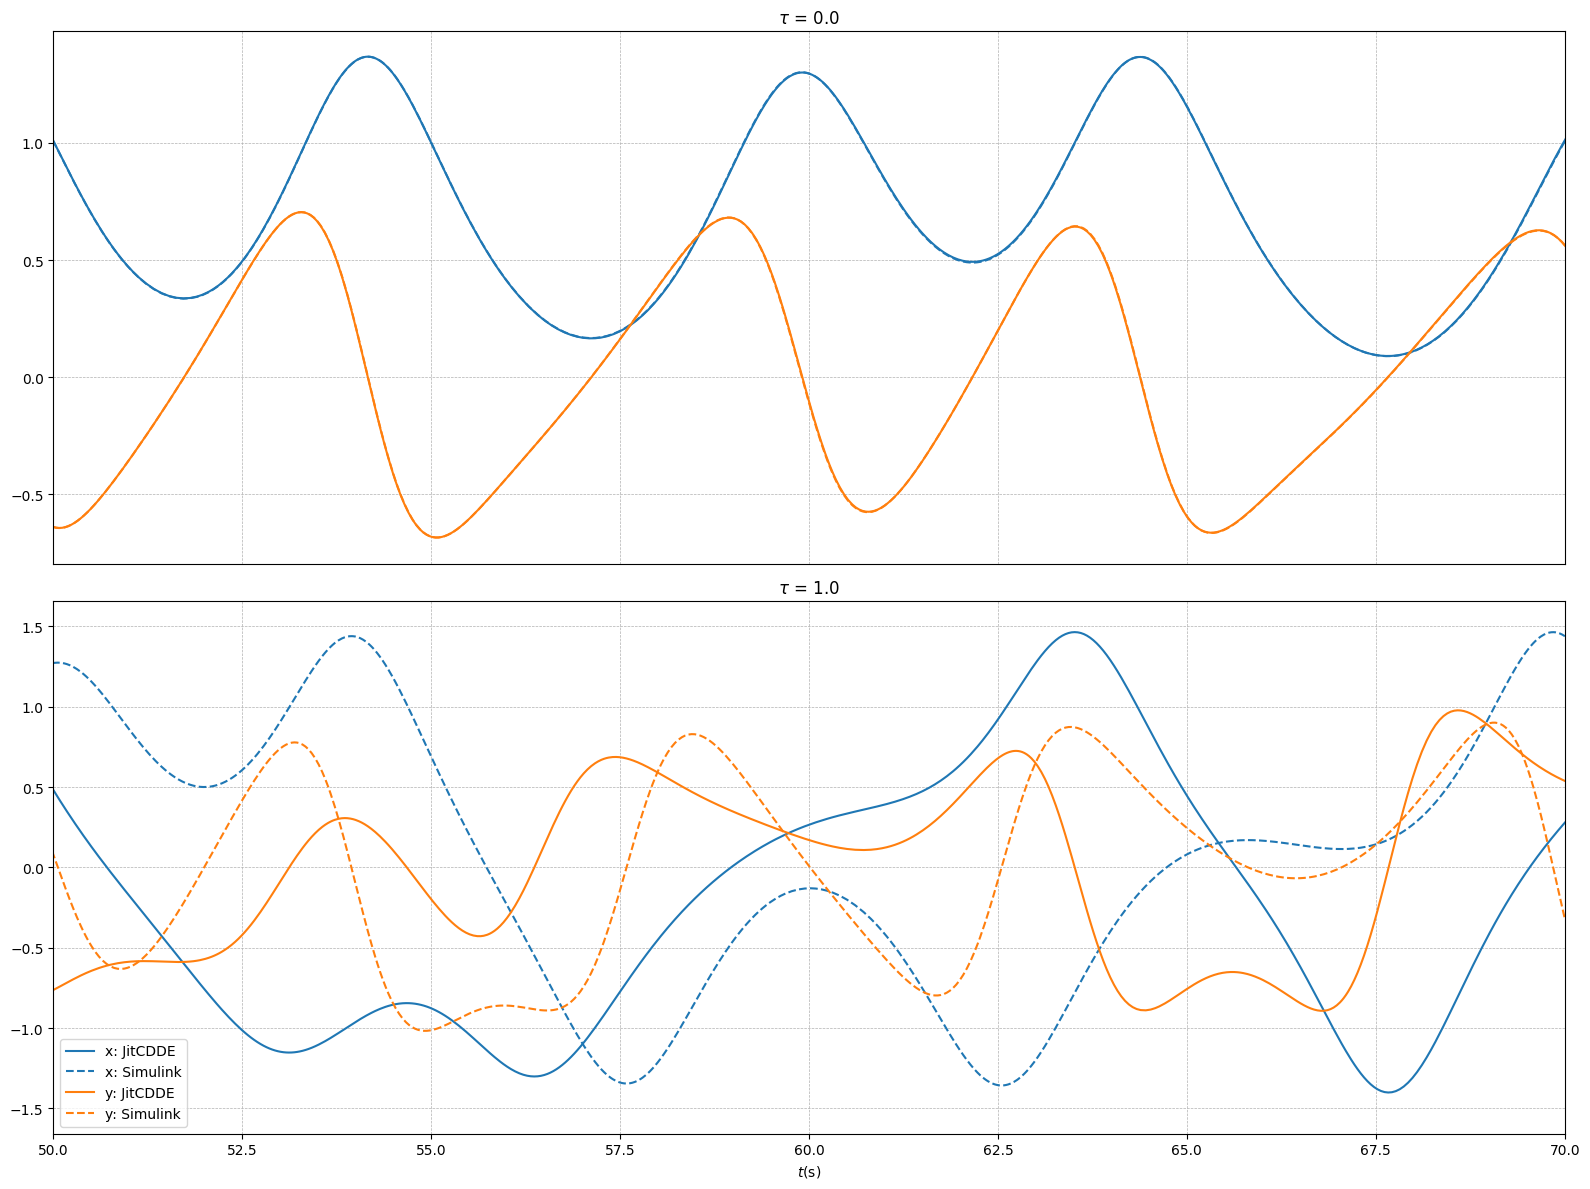

In [18]:
fig,axs = plt.subplots(2,1,figsize=(16,12))

t0 = 50
tf = 70
# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# # Function to update the style of each axis
def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
    ax.set_xlim([t0,tf])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)


#no delay
update_axis_style(axs[0], r"$\tau$ = 0.0")
axs[0].plot(times2,[d[0] for d in sols[1]],label="x: JitCDDE",color=colors[0])
axs[0].plot(df_simulink_no_tau["time"],df_simulink_no_tau["x_data"],label="x: Simulink",color=colors[0],linestyle="--")
axs[0].plot(times2,[d[1] for d in sols[1]],label="y: JitCDDE",color=colors[1])
axs[0].plot(df_simulink_no_tau["time"],df_simulink_no_tau["y_data"],label="y: Simulink",color=colors[1],linestyle="--")
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# delay
update_axis_style(axs[1], r"$\tau$ = 1.0",x_label=r"$t$(s)")
axs[1].plot(times1,[d[0] for d in sols[0]],label="x: JitCDDE",color=colors[0])
axs[1].plot(df_simulink_tau["time"],df_simulink_tau["x_data"],label="x: Simulink",color=colors[0],linestyle="--")
axs[1].plot(times1,[d[1] for d in sols[0]],label="y: JitCDDE",color=colors[1])
axs[1].plot(df_simulink_tau["time"],df_simulink_tau["y_data"],label="y: Simulink",color=colors[1],linestyle="--")
axs[1].legend()

# delay
# axs[0,0].plot(T,[s[20] for s in sol_jit],label="core 1",color=colors[0]) 
# axs[0,0].plot(T,[s[21] for s in sol_jit],label="core 2",color=colors[1]) 
# axs[0,0].plot(T,[s[2] for s in sol_jit],label="hx 1",color=colors[2])  
# axs[0,0].plot(T,[s[3] for s in sol_jit],label="hx 2",color=colors[3])
# axs[0,0].plot(T,[s[4] for s in sol_jit],label="hx 3",color=colors[4])
# axs[0,0].plot(T,[s[5] for s in sol_jit],label="hx 4",color=colors[5]) 

# # Coolant temperatures
# update_axis_style(axs[0, 1], "Coolant Node Temperatures (C)", y_label=r"$^\circ$ C")
# axs[0, 1].plot(T, sol_jit[:, 6], label=f"hx 1", color=colors[0])
# axs[0, 1].plot(T, sol_jit[:, 7], label=f"hx 1", color=colors[1])
# axs[0, 1].plot(T, sol_jit[:, 8], label=f"hx 1", color=colors[2])
# axs[0, 1].plot(T, sol_jit[:, 9], label=f"hx 1", color=colors[3])
# axs[0, 1].plot(T, sol_jit[:, 0], label=f"r 1", color=colors[4])

# # Tube node temperatures
# update_axis_style(axs[0, 2], "Tube Node Temperatures (C)", y_label=r"$^\circ$ C")
# axs[0,2].plot(T,[s[6] for s in sol_jit],label="hx 1",color=colors[0]) 
# axs[0,2].plot(T,[s[7] for s in sol_jit],label="hx 2",color=colors[1]) 

# # Precursor concentrations
# update_axis_style(axs[1, 2], "Precursor Concentrations", x_label="t (s)", y_label=r"concentration (1/cm$^3$)")
# for i in range(6):
#     axs[1, 2].plot(T, sol_jit[:, i+13], label=f"C{i+1}", color=colors[i])
# axs[1, 2].set_yscale("log")

# # Multiplication factor temp
# update_axis_style(axs[1, 0], r"$n$", x_label="t (s)", y_label=r"$\frac{n}{n_0}$")
# axs[1, 0].plot(T, sol_jit[:, 12], label="n", color='tab:blue')

# # Reactivity
# update_axis_style(axs[1, 1], r"$\rho$", x_label="t (s)")
# axs[1, 1].plot(T, sol_jit[:, 22], label="n", color='tab:orange')

plt.tight_layout()


/tmp/ipykernel_245190/118870186.py:2: RuntimeWarning: invalid value encountered in divide
  x_errs = [((sols[0][i]-df_simulink_tau["x_data"][i])/sols[0][i])**2 for i in range(len(times1))]
/tmp/ipykernel_245190/118870186.py:3: RuntimeWarning: invalid value encountered in divide
  y_errs = [((sols[0][i]-df_simulink_tau["x_data"][i])/sols[0][i])**2 for i in range(len(times1))]


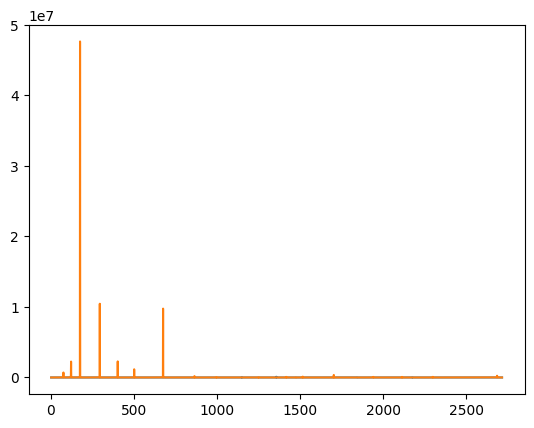

In [16]:
import math
x_errs = [((sols[0][i]-df_simulink_tau["x_data"][i])/sols[0][i])**2 for i in range(len(times1))]
y_errs = [((sols[0][i]-df_simulink_tau["x_data"][i])/sols[0][i])**2 for i in range(len(times1))]
plt.plot(x_errs)
